### 91. Decode Ways - 5/31/2024

In [ ]:
############################### Improvement Table ###########################################
"""
Repitition # -  Time Taken   

1st Repetition - 2 hrs
2nd Repetition - 20 mins (I do remember the implementation and with a lot of help)
3rd Repetition - 20 mins (less help then the previous attempt)
4th Repetition - 17 mins (with no help at all)
5th Repeition - 30 mins (implementation without dp, needed help to add dp in our solution)
    (total 50 mins)
6th Repetition - 34 mins (no help, this is a great question to solve)
7th Repeition - 20 mins (little help only)
8th repetition - 10 mins (without any help)
"""

### Model Answer

### 1st Repitition

In [ ]:
"""
UMPIRE:

U: we are given a string of digits where an encoding patter is where
    'A' -> '1'
    'B' -> '2'
    'C' -> '3' and so oonn

11106 -> 1 1 1 0 6
         3 3 3 0 1 -> 10 / 5 = 2 ways
         11 10 6
         
# if no data structures work try using dynampic programming or dfs

M: Maybe Pointers 

NOTE: OMG it's one of the best problem I have solved in terms of dynamic 
Programming. there's so much to do in the simple problem. To understand this
problem and we are going to implement it, we have to first discuss 
DECISION TREES


As the name implies we are visualization the decision we are making in the
form trees. For this problem the decision tree would look like this:

INPUT: '1 1 1 0 6'
DECISION TREE:
Image below
                  
"""

### DECISION TREE

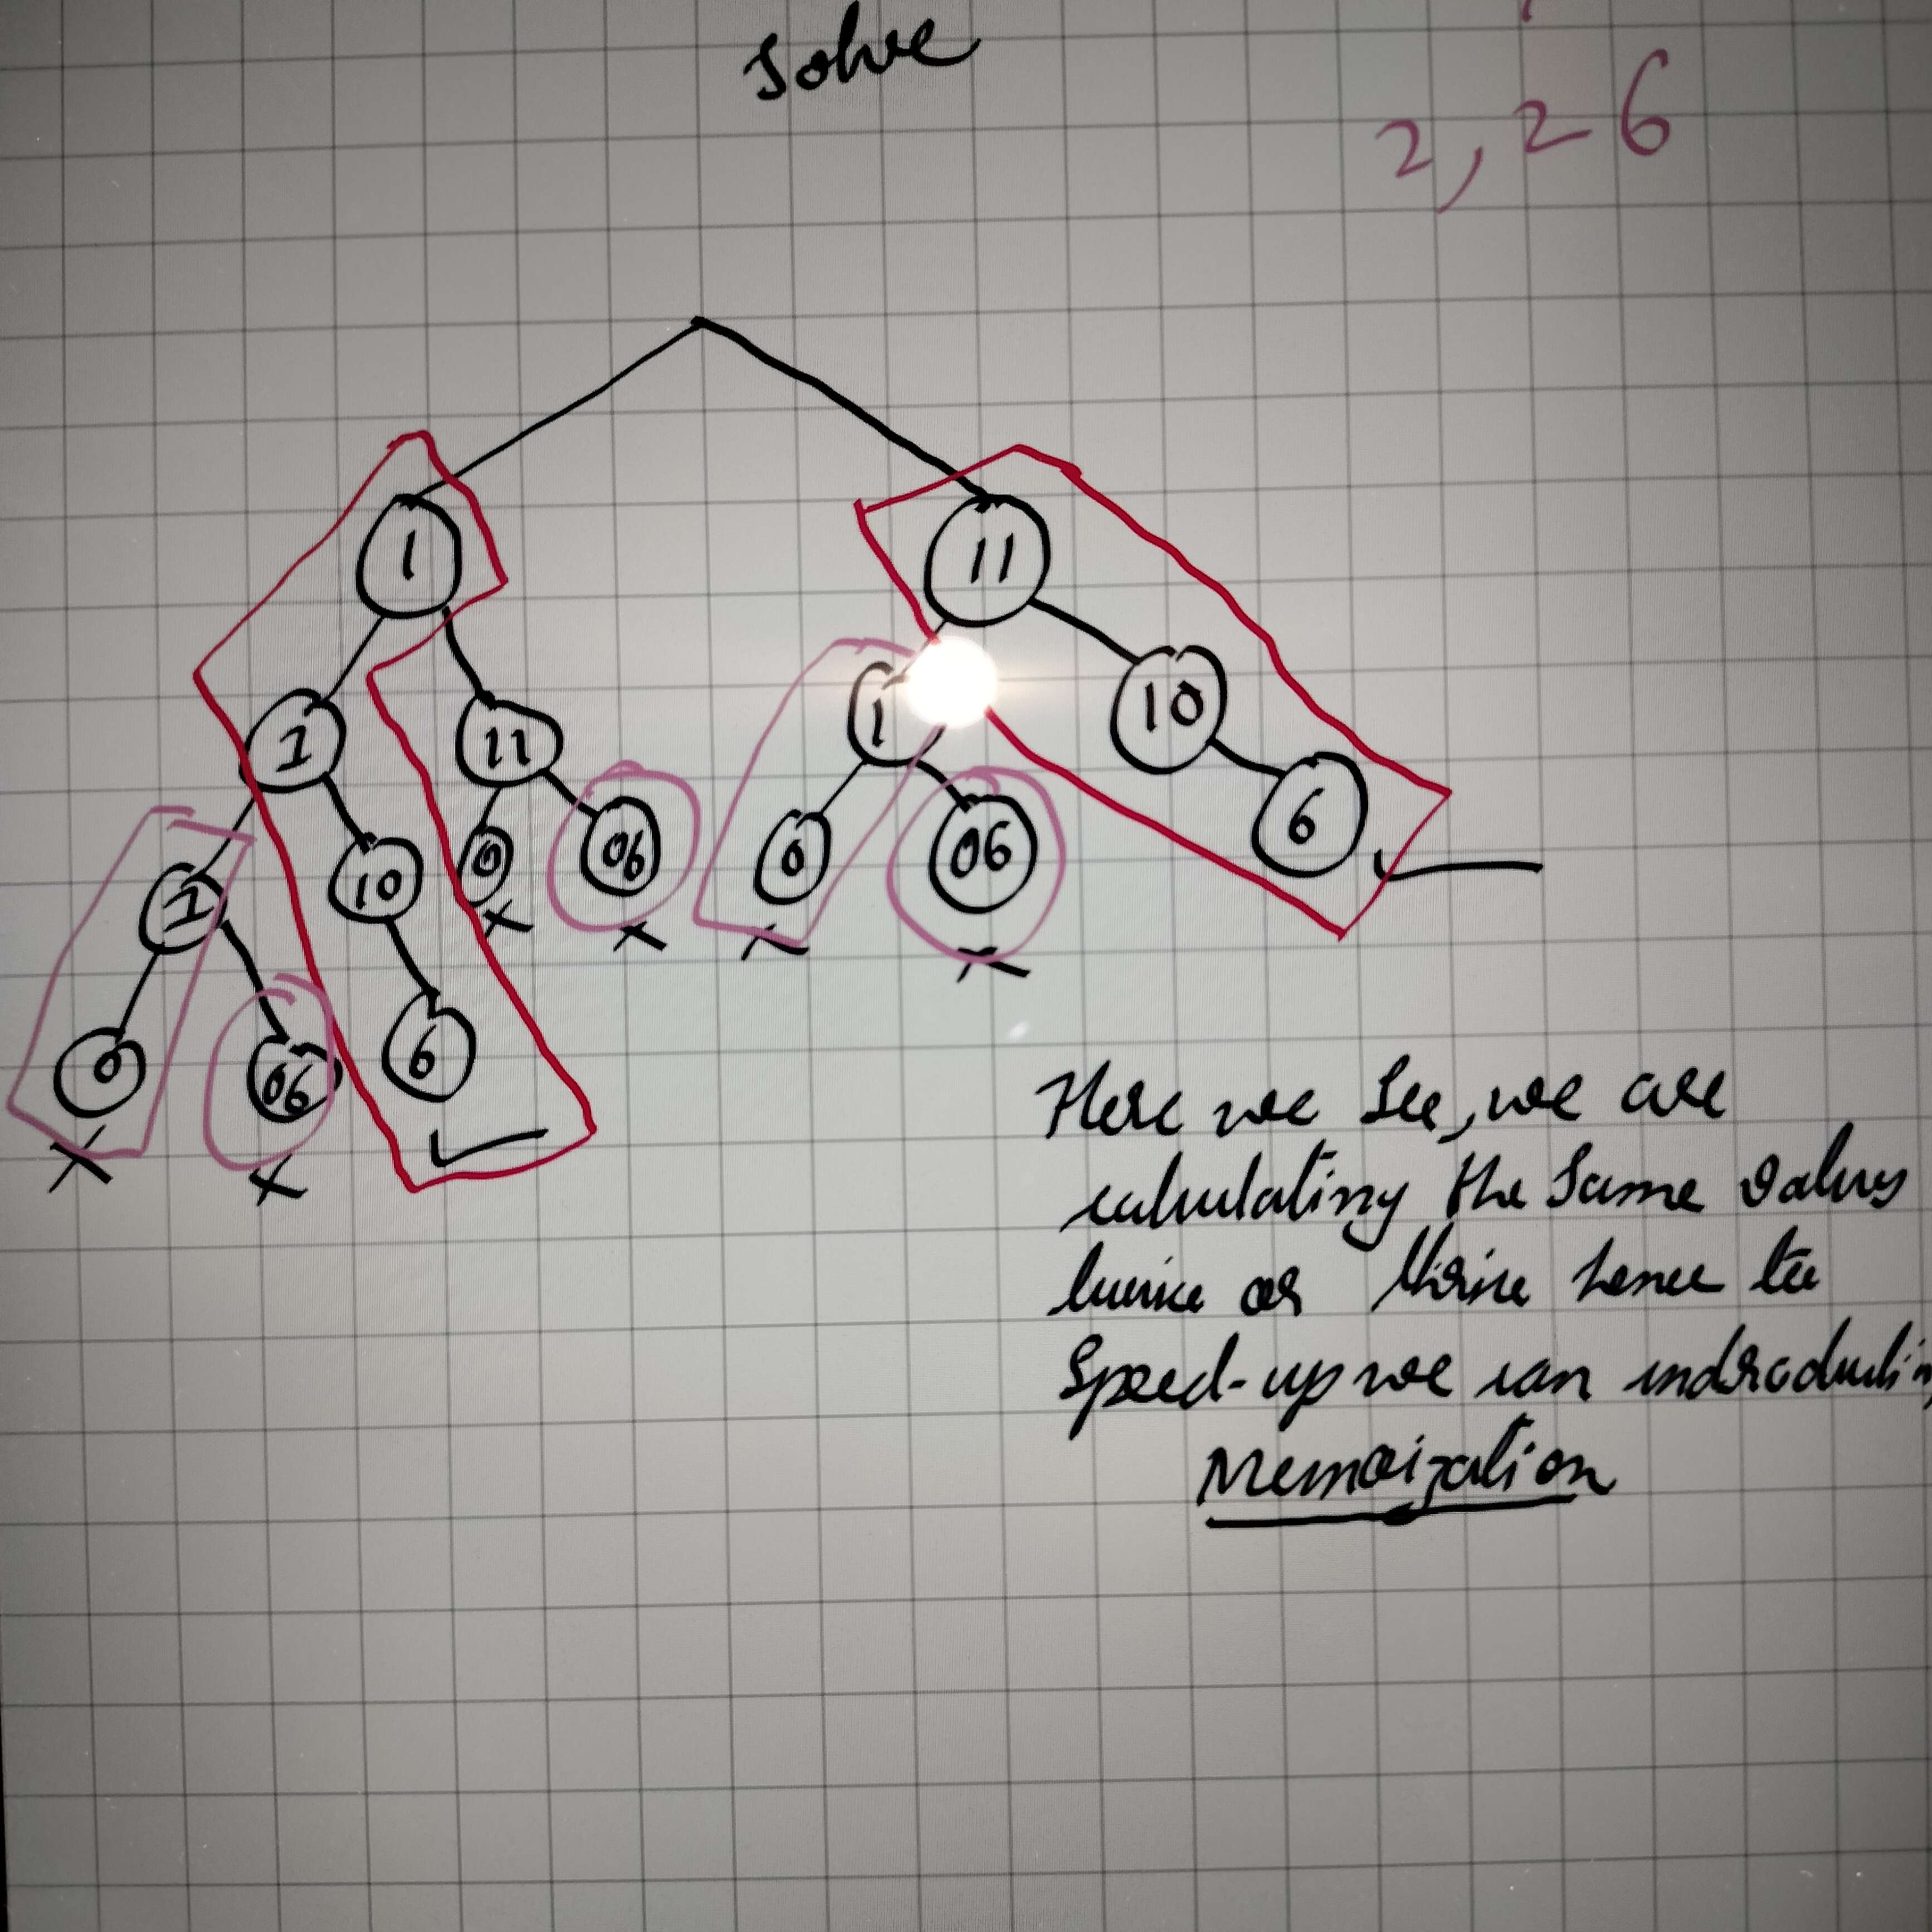

In [1]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "D:/Vasudev_Agarwal/Work_Fun/1_Texas_AM/1_Technical_Interview/Leed_Code_Repo/Blind75/Images/91DecodeWaysDecisionTree.jpg", width = 400, height = 500)


In [ ]:
"""
As per the question, we can either choose just one digit or two digit and in the above decision tree
we are looking at every possible combination. Also, according to question we can decode digits 
between '1' and '26' and if we encounter '0' we will return 0. Also as we see many same computatoin
we are going to memoization to to speed up the whole program which reduces the computation time
from O(2^n) to O(n) as we only check if element once and there's no computation in deciding either one or two digit

NOTE: As we see an tree above we are going to use DFS (Depth First Search Algo) with custom Traversal
DFS Means recursion which means we have to have base cases both negative and positive.
Also we are attempting dfs with index number

In, memoization we are storing the no. of ways to decode a string from index 'i'

Below DFS Algo with Memoization
"""

memo = {len(s): 1}

def dfs(index):

    if index in memo:
        return memo[index]
    
    if s[index] == '0':
        return 0
    
    res = dfs(index + 1)

    if (index + 2 < len(s) and s[i + 2] == '1' or s[i + 2] == '2' and s[i + 2] in '0123456'):
        res += dfs(index + 2)

    memo[index] = res

    return res

dfs(0)


"""
See, the implementation is like 10 lines but the concept behind are complex and hard to understand
From decision tree, dfs, to memoization and dynamic programming and it's more difficult to build a solution from scratch
"""

In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        memo = {len(s): 1}

        def dfs(index):
            if index in memo:
                return memo[index]
            
            if s[index] == '0':
                return 0
            
            res = dfs(index + 1)

            if (index + 1 < len(s) and s[index] == '1' or s[index] == '2' and s[index + 1] in '0123456'):
                res += dfs(index + 2)

            memo[index] = res

            return res
        
        dfs(0)

### 2nd Repetition - 6/3/2024

In [ ]:
"""
UMPIRE

U: We are given a string of digits and we have to return the no. of ways 
of decoding the string of digits. 

Hash Algo: 'A' -> '1', 'B' -> '2', 'C' -> '3', 'D' -> '4' and so on...

example given: 1 1 1 0 6 and we can decode in the following ways:
- 1 1 10 6
- 11 10 6

HERE: 0 and 06 in invalid as we can't decode them

- if we sucessfully reach the end of string, we count it as 1 way of decoding
    successfully means that all the digits are within the range of 1 and 26

M: Dyanmic Programming, Decision Tree, Custom Depth First Search

Decision Tree:
Example: 1 1 1 0 6

                    1               11
                                        10
                                            6
                1       11
            1               06 
        0

NOTE: 06 is invalid and 0 is invalid as well. Looking at the right hand side we 
see a possible way of decoding 1 1 1 0 6 digits of strings

In the above decision tree we see repeated computation, which means we can
use memoization to reduce the no. of computation.

Possible SubProblem: getting the no. of ways of decoding a substring or based
                        on the index of string


NOTE: we can create a combination between one digit and two digit and 
    the two digit has to be less than 26 for it to be a valid decoding
    and for two digit combination, first digit has to be '1' or '2' for it to 
    be a correct decoding

P:
- Create a dfs custom travseral function taking index as an arguement
"""

class Solution:
    def numDecodings(self, s: str) -> int:
        dp = {len(s): 1}


        def dfs(index):

            if index in dp:
                return dp[index]

            if s[index] == '0':
                return 0
            
            res = dp[index + 1]

            if index + 1 < len(s) and s[index] == '1' or s[index] == '2' and s[index] in '0123456':
                res += dp[index + 2]

            return res
        
        return dfs(0)

### 3rd Repetition - 6/8/2024

In [ ]:
"""
UMPIRE:

U: we're given a strings of digits, that we have to decode 
    and we can decode any digit between '1' and '26'

M: Dynamic Programming, Decision Tree, custom dfs algo
Sub Problem: find the no. of ways to decode a sub-string
    for example we are given strings of digit: 11106
    first we have to find the no. of ways to decode '6' then '06' then '106'
    and store in an memory which is based on the index

P: 
1. create a dfs function taking in index and if the index is >= len(s) then return
    1 to indicate that we have reached the end of the decode string
2. if s[index] = 0, we will return 0
3. if index in the our memo, then we return it from the memory
    which tells the no. of ways to decode starting from position 'i'
NOTE: Here as we can choose two digit numbers, when index is 1 or 2 we have
make sure that we are adding the no. of ways

Here it's important to look at the Decision Tree
"""

class Solution:
    def numDecodings(self, s: str) -> int:
        dp = {len(s) : 1}

        def dfs(i):
            if i in dp:
                return dp[i]
            
            if s[i] == '0':
                return 0
            
            res = dfs(i + 1)

            if (i + 1) < len(s) and (s[i] == '1' or s[i] == '2' and s[i + 1] in '0123456'):
                res += dfs(i + 2)

            dp[i] = res

            return res

        return dfs(0)

### 91. Decode Ways - 6/16/2024

In [ ]:
"""
UMPIRE:

U: we are given a string of digits and we have to return the no. of decoding
that string of digits
our valid range of decode is '1' to '26'

M: Dynamic Programming and custom dfs traversal

Sub-Problem: as we are using dfs, we're essentially storing
the no. of ways decoding a sub-string starting from the end of
the string and we return the count up the dfs traversal or chain

we are using 'index' to do dfs traversal and similar creating 
memo based on the index of the string
P:
1. 
"""

In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        dp = {len(s): 1}

        def dfs(index):
            if index in dp:
                return dp[index]
            
            if s[index] == 0:
                return 0       
            
            num = dfs(index + 1)
            if (index + 1) < len(s) and (s[index] == '1' or (s[index] == '2' and s[index + 1] in '0123456')):
                num += dfs(index + 2)

            dp[index] = num

            return num
        
        return dfs(0)
                                          
            


### 5th Repeition - 8/29/2024

In [1]:
"""
UMPIRE:

U: we are given a string of digits, our jobs is to return the no of ways 
to decode it. The hasing algo is where 1 -> 'A', 2 -> 'B' and son till alphabet
Z

M: dfs + dp
Q1. find out the running time of dfs algo

P:

- create a dfs function, which when reached the end of the string
updateds the count of the no. of ways to decode the string of digits

- inside the dfs function, we need to make sure we check if the 
current digit is '0' in which case we return back
if '1' we call dfs and check if we can call for two digit as well
if '2' we call dfs and check if we call for two digit as well making sure
     that the second digiit is between 1 and 6
if 3+ we only consider the single digit and nothing else
"""

class Solution:
    def numDecodings(self, s: str) -> int:
        res = [0]

        def dfs(index):
            if s[index] == '0':
                return
            
            if index == len(s) - 1:
                res[0] += 1

            if index + 1 < len(s) and s[index] == '1' or (s[index] == '2' and s[index + 1] in '0123456'):
                dfs(index + 2)

            dfs(index + 1)


        dfs(0)
        return res[0]
                            





'\nUMPIRE:\n\n'

### 5th Repetition - 2nd Try - 8/29/2024

In [ ]:
"""
In above solution we found to introduction Dynamic Programming
as we look into the image below we see many examples of 
repeated computation, which can be stored in a dictionary by their
and used again, speeding-up the execution time

Here, we are storing no. of way to decode a substring
starting from the end of the string, because we are doing an 
dfs traversal

Running time is O(n) because we are call dfs for every index
only once, as we are storing or memorizing the result in a dp
"""
class Solution:
    def numDecodings(self, s: str) -> int:
        dp = {len(s): 1}

        def dfs(index):
            if index in dp:
                return dp[index]
            
            if s[index] == '0':
                return 0
            
            num = dfs(index + 1)

            if (index + 1) < len(s) and (s[index] == '1' or (s[index] == '2' and s[index + 1] in '0123456')):
                num += dfs(index + 2)

            dp[index] = num

            return num
        
        return dfs(0)
        
    

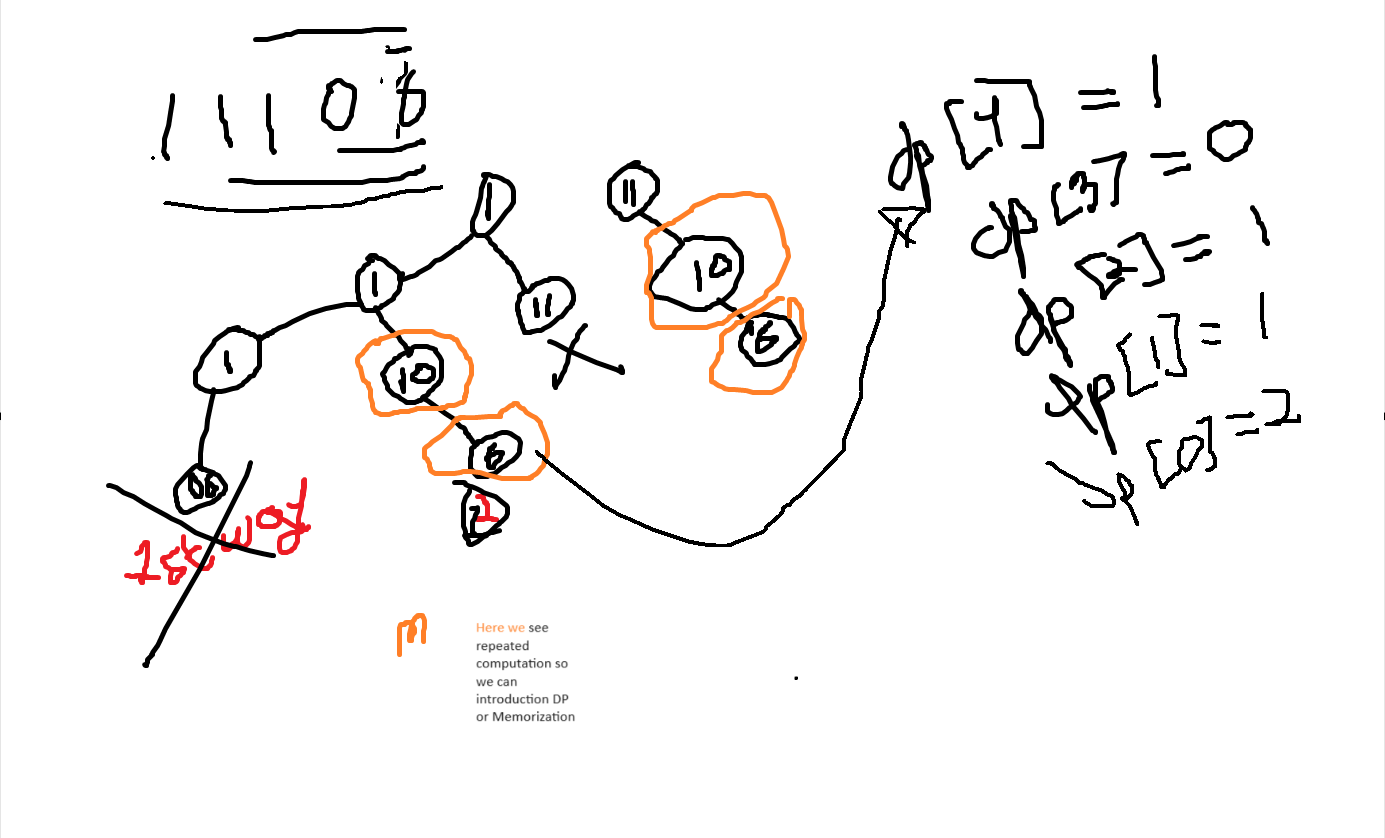

### 6th Repetition - 9/2/2023

In [ ]:
"""
UMPIRE

U: We are given a string of digits, our job is to return the no. of ways 
    to decode the given string of digits
    Hashing algo: '1' -> 'A', '2' -> 'B', '3' -> 'C', ..., '26' -> 'Z'

M: Dynamic Programming + Dfs

I: 
1. Create an res list, which stores, the no. of ways to decode substring/string
from the current index to the end of the string, while also according both 
a single digit and double digit number

"""

class Solution:
    def numDecodings(self, s: str) -> int:

        dp = {len(s): 1}

        def dfs(index):

            if index in dp:
                return dp[index]

            if s[index] == '0':
                return 0
            
            num = dfs(index + 1)

            if (index + 1) <= len(s) and (s[index] == '1' or (s[index] == '2' and s[index + 1] in '0123456' )):
                num += dfs(index + 2)

            dp[index] = num

            return num

        return dfs(0)


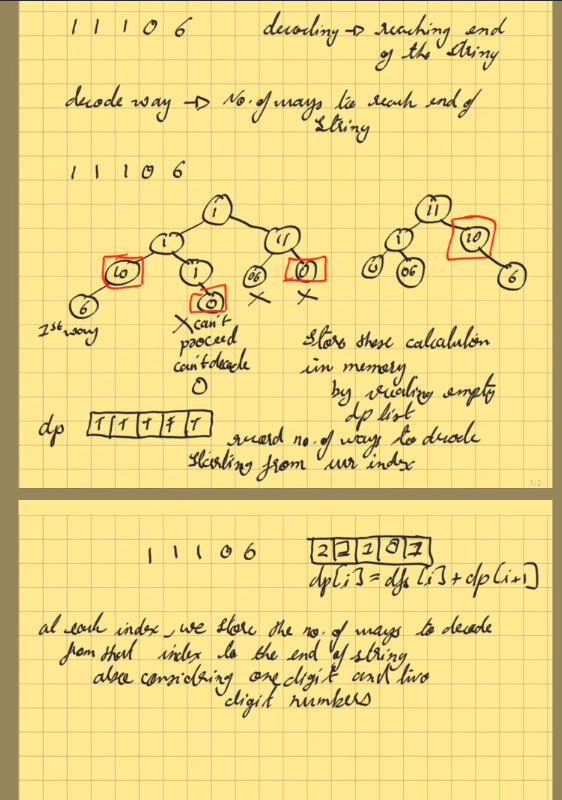

### Using Dp is easier - 7th Repetition - 11/1/2024

In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        # To use dynamic Programming 
        # we need to climb this string 's'
        # and our available steps are from "1" to "26"
        # Or at every index we either jump one step or two step


        # s = "226"
        # dp = [0, 0, 1]

        dp = [0] * (len(s) + 1)
        dp[-1] = 1
        dp[-2] = 1 if s[-1] != "0" else 0  # Base case for last character
        for i in range(len(s) - 2, -1, -1):
            if s[i] != "0":
                dp[i] = dp[i + 1]
                if 10 <= int(s[i:i+2]) <= 26:
                    dp[i] += dp[i+2]


        return dp[0]

### 7th Reptition - 12/21/2024

In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        # "11106"

        print(type(s))

        dp = [0] * (len(s) + 1)
        # 6 slots, index 0 -> 5
        dp[-1] = 1 # tells us that we have reached the end of the list

        for i in range(len(s) - 1, -1, -1):
            if int(s[i]) >= 1 and int(s[i]) <= 9:
                dp[i] = dp[i + 1]

                if i + 1 < len(s) and int(s[i:i + 2]) >= 10 and int(s[i:i + 2]) <= 26:
                    dp[i] += dp[i + 2]

        return dp[0]
        

### 8th Repetition - 2/2/2025

In [ ]:
class Solution:
    def numDecodings(self, s: str) -> int:
        # Dynamic Programming
        # at every index check if we can reach the end of the list
        # and at every index we have two ways to jump
        # single valid digit
        # two valid digit (i.e. '23', '12'..)
        # validation will be done either by having a hashmap
        # or using if loops to check if they're inbetween 1 to 9
        # and 10 to 26
        # when encounter '0' we skip the curren iteration

        # starting from the end of the list we are going to record
        # by representing '1' we can reach the end of the list

        dp = [0] * (len(s) + 1)
        dp[-1] = 1
        

        for i in range(len(s) - 1, -1, -1):
            if s[i] == '0':
                continue

            if int(s[i]) <= 9 and int(s[i]) > 0:
                dp[i] = dp[i + 1]

                if s[i:i+2] and int(s[i:i+2]) <= 26 and int(s[i:i + 2]) >= 10:
                    dp[i] += dp[i + 2]

        return dp[0]

        # Running time - O(n)
        # Space Complexity - O(n)

            

        